# RO47002 Machine Learning for Robotics
* (c) TU Delft, 2021
* Period: 2021-2022, Q1
* Course homepage: https://brightspace.tudelft.nl/d2l/home/401403

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Moreover, if you see an empty cell, please DO NOT delete it, instead run that cell as you would run all other cells. Please fill in your name(s) and other required details below:

In [190]:
GROUP_NUMBER = "10"
STUDENT_NAME1 = "Gregorio Marchesini"
STUDENT_NUMBER1 = "5622824"
STUDENT_NAME2 = "Luoqi Hu"
STUDENT_NUMBER2 = "4168518"

In [191]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

### General announcements

* Do *not* share your solutions, and do *not* copy solutions from others. By submitting your solutions, you claim that you and your lab partner alone are responsible for this code.

* Do *not* email questions directly, since we want to provide everybody with the same information and avoid repeating the same answers. Instead, please post your questions regarding this assignment in the correct support forum on Brightspace, this way everybody can benefit from the response. If you do have a particular question that you want to ask directly, please use the scheduled practicum hours to ask a TA.

* There is a strict deadline for each assignment. Students are responsible to ensure that they have uploaded their work in time. So, please double check that your upload succeeded to the Brightspace and avoid any late penalties.

* This [Jupyter notebook](https://jupyter.org/) uses `nbgrader` to help us with automated tests. `nbgrader` will make various cells in this notebook "uneditable" or "unremovable" and gives them a special id in the cell metadata. This way, when we run our checks, the system will check the existence of the cell ids and verify the number of points and which checks must be run. While there are ways that you can edit the metadata and work around the restrictions to delete or modify these special cells, you should not do that since then our nbgrader backend will not be able to parse your notebook and give you points for the assignment. You are free to add additional cells, but if you find a cell that you cannot modify or remove, please know that this is on purpose.

* This notebook will have in various places a line that throws a `NotImplementedError` exception. These are locations where the assignment requires you to adapt the code! These lines are just there as a reminder for youthat you have not yet adapted that particular piece of code, especially when you execute all the cells. Once your solution code replaced these lines, it should accordingly *not* throw any exceptions anymore.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

# Practicum 2
* Before performing this practicum, work through Book chapters: 2, 3
* **Deadline**: Sunday, September 20, 2020, 23:59

## Objectives
In this practicum, you and your lab partner will experiment with data collection, annotation, and turning a simple computer vision task into a machine learning problem.
This practicum will not go very deep in machine learning theory, but is more intended to make you familiar with the broader context of how machine learning can be applied in robotics, and experience some practical steps in performing your own data collection.
You will also demonstrate that you can perform several basic tasks with sklearn which have been explained in the book chapters.


## 1. The problem description: a pen detector

The context of this practicum is of a robot which will need to be able to pickup a pen from a desk or table. The robot has a basic down-facing camera that it can place on top of the desk to inspect an area of interest.
The goal is to detect within this area where the pen is located, and how it is oriented. To do this, we formulate a multi-class classification problem: given a small image patch from the camera image, classifiy if this patch is the tip (start) of the pen, the end of the pen, the middle of the pen, or if it is just background. If we could succesfully classify all regions in the image, we could determine the most probable image locations where the pen starts and ends, and thus its shape and orientation relative to the camera. With this information our robot has enough information to position and orient its (imaginary) grasper, and pick up the pen and put it in its pen collection.


![Robot holding a pen](extra/grasping-robot.jpg)
Image source: https://gigazine.net/gsc_news/en/20101221_robo_xero/

**After completing this practicum, you should be able to:**
* perform basic operations on an image
* understand the basic idea of entropy
* understand the basics of supervised learning with labelled data
* train different classifiers with labelled images to detect key features on the image


### 1.1 Setup common python stuff
We will start by loading a few common python dependencies

In [192]:
# Python ≥3.5 is required
import sys

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import os, glob

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [193]:
import ipywidgets
from IPython.display import display

from collections import OrderedDict,Counter

In [194]:
import scipy
'''
if you have <ModuleNotFoundError: No module named 'skimage'>
try in the terminal: conda install scikit-image
'''
import skimage
import skimage.transform
import skimage.util

### 1.2 Loading the images and annotations

We start by listing the jpg files in the directory `images/mypen/`.
If everything is correct, we should find 37 jpg images.

In [195]:
import glob

def list_images(image_dir, filename_expression='*.jpg'):
    filenames = glob.glob(os.path.join(image_dir, filename_expression))
    filenames = sorted(filenames) # important for cross-platform compatiblity
    print(f'Found {len(filenames)} image files in the directory "{image_dir}"')
    return filenames

In [196]:
IMAGE_DIR = 'images/mypen'

# list all images. There should be 37 images in the images/mypen/ directory
filenames = list_images(IMAGE_DIR)
N = len(filenames)

Found 37 image files in the directory "images/mypen"


Le's see if we can load the first image and visualize it

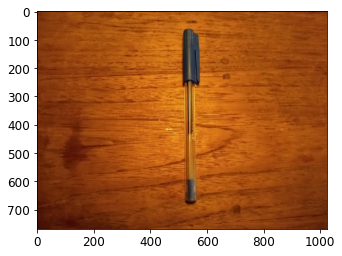

(768, 1024, 3)


In [197]:
# Let's check if we can load and visualize an image here
I = plt.imread(filenames[0])

# this should show a picture of a pen
plt.figure()
plt.imshow(I)
plt.show()

print(np.shape(I))

Let's start simple by creating 3 function to determine the width, height, and number of color channels of a loaded image. Channels wouls be 3 for a color image (Red, Green, Blue), and for instance 1 for a grayscale image.

Note that images are loaded as numpy matrices, and hence pixels are indexed similar as mathematical arrays, i.e. (row, column). This means that the first dimension of the image goes into the vertical direction, and the second dimension into the horizontal direction.

In [198]:
def get_image_width(I):
    height,width,numChan = np.shape(I)
    return width
    #raise NotImplementedError()

def get_image_height(I):
    height,width,numChan = np.shape(I)
    return height
    #raise NotImplementedError()

def get_image_channels(I):
      height,width,numChan = np.shape(I)
      return numChan
    
    #raise NotImplementedError()

In [199]:
assert(get_image_width(I) == 1024)
assert(get_image_height(I) == 768)
assert(get_image_channels(I) == 3)

I2 = np.swapaxes(I, 0, 1) # swap the width and height, but keep the 3rd (color channel) dimension in place
assert(get_image_width(I2) == 768)
assert(get_image_height(I2) == 1024)
assert(get_image_channels(I2) == 3)


### 1.3 Load all images and annotations

Previously, we found all images in the given directory. Now we are going to load all of them. 

In [200]:
Is = [plt.imread(filename) for filename in filenames]
print('loaded %d images' % len(Is))

loaded 37 images


Using the standard python `pickle` module, load the data annotations which are stored as a numpy array in `annots.npy` which is stored in the same directory as the images. You should use the built-in function in `pickle`, and you can find the documentation here: https://docs.python.org/3/library/pickle.html .
If everything is correct, you will end up with a numpy array.

In [201]:
import pickle

annots = None # store your results in the variable `annots`
annot_filename = os.path.join(IMAGE_DIR, 'annots.npy')

with open(annot_filename,'rb') as ann :
     annots = pickle.load(ann)
print(annots.shape)
type(annots)
# raise NotImplementedError()

(37, 4)


numpy.ndarray

In [202]:
# if the annotations were correctly loaded, they should be a N x 4 numpy array
assert(type(annots) == np.ndarray)
assert(annots.shape == (37, 4))


Once we sucessfully loaded all images and annotations, we are now ready to implement a function to plot them. We can use `matplotlib.pyplot` (https://matplotlib.org/3.3.1/api/pyplot_summary.html) for this, which provides a very similar interface to the plotting commands found in Matlab.

In this plotting routine, you should execute the following steps:

1. show the image, plot the following steps on top of the image
1. plot point p1 as a green circle, with markersize 10, and label "tip"
1. plot point p2 as a red circle, with markersize 10, and label "end"
1. plot a cyan line starts at one point and end at another, give it linewdith 2 for better visualization
1. Add a legend (pro-tip: if you use the "label" keyword to the plot() commands to [simplify creating the legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html))

In [203]:
def show_annotation(I, p1, p2):
    plt.figure
    ax = plt.gca()
    ax.imshow(I)
    circle1 = plt.Circle(p1,10,color='g',linewidth=3,label='tip')
    circle2 = plt.Circle(p2,10,color='r',linewidth=3,label='end')
    line = plt.Line2D([p1[0],p2[0]],[p1[1],p2[1]],color='c',linewidth=1,label='body')
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_line(line)
    plt.legend()
    plt.show()
    
    # plot point p1 as a green circle, with markersize 10, and label "tip"
    # plot point p2 as a red circle, with markersize 10, and label "end"
    # plot a line starts at one point and end at another. 
    # Use a suitable color and linewidth for better visualization
    # Add a legend (tip, you can use the "label" keyword when you plot a point)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    # done, show the image
    plt.show()

If everything is correct, this call to `show_annotation()` below should show a similar image as this reference:
![reference to first image](extra/reference_annotation.png)

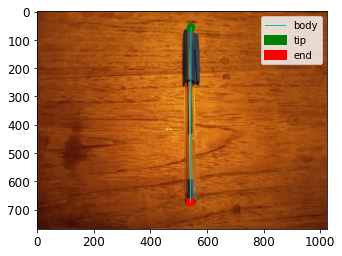

In [204]:
img_idx = 0
I = Is[img_idx]
p1 = annots[img_idx,:2].copy() # point 1, tip of the pen
p2 = annots[img_idx,2:].copy() # point 2, end of the pen
show_annotation(I, p1, p2)

### 1. 4 Use annotations to extract and label patches

We will extract from each image a bunch of image patches of $100 \times 100$ pixels.
In a moment we will introduce some function to determine at which locations in the images will shall extract the image patches, but first you will need to write a few lines of code which:

- takes as first input `I`: an RGB image 
- takes as second input `p`: a 2D location in pixel coordinates
- returns the $100 \times 100 \times 3$ image patch centered around pixel coordinates p

To extract an image patch, you can use array slicing.
Note that point p will be given as a 2-dimensional floating point numpy vector. You should cast the elements to `int` types before you can use them to slice an array.


In [205]:
# the size of the patch in pixels
WIN_SIZE = (100, 100, 3)

# for convenience, half the window
HALF_WIN_SIZE = (WIN_SIZE[0] // 2, WIN_SIZE[1] // 2, WIN_SIZE[2])

In [206]:

def get_patch_at_point(I, p):
    # the size of the patch in pixels
    WIN_SIZE = (100, 100, 3)

    # for convenience, half the window
    HALF_WIN_SIZE = (WIN_SIZE[0] // 2, WIN_SIZE[1] // 2, WIN_SIZE[2])
    P = I[int(p[1])-HALF_WIN_SIZE[0]:int(p[1])+HALF_WIN_SIZE[0], \
          int(p[0])-HALF_WIN_SIZE[1]:int(p[0])+HALF_WIN_SIZE[1], \
          0:HALF_WIN_SIZE[2]].copy()
    
    #raise NotImplementedError()
    
    return P



To test your solution, let's extract the patch around the annotated tip of the pen. If everything is correct, you should be able to see the tip similar to this reference image: ![reference patch](extra/reference_patch.png)

(100, 100, 3)


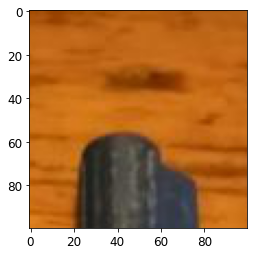

In [207]:
P = get_patch_at_point(I, p1) # get the patch around the tip of the pen
print(np.shape(P))
plt.imshow(P)
plt.show()

assert(get_image_width(P) == 100)
assert(get_image_height(P) == 100)
assert(get_image_channels(P) == 3)

### 1.5 Transform patches into feature vectors

Next, we are going to perform a simple transformation of the extracted patches. An input image patch should be transformed into a vector. 
To do so, complete the `patch_to_vec` function which takes an image patch as input, and should return a vector $x$,
which will be the feature vector for our machine learning experiments.
The function should do the following:

1. Resize the patch to a $9 \times 9 \times 3$ image. To resize the image (patch), `skimage.transform` might contain a useful function, check the documentation here: https://scikit-image.org/docs/dev/api/skimage.transform.html. Note that we do not want to use any anti_aliasing features, since these are slow and we need to convert many patches.

2. After downsizing the patch, reshape or flatten the patch (which is a 3-dimensional [tensor](https://nl.wikipedia.org/wiki/Tensor)) to a vector (i.e. a 1-dimensional tensor).

In [208]:
# the target size of the patches after downsizing
FEAT_SIZE = (9,9,3)
from skimage.transform import resize

In [209]:
def patch_to_vec(P):
    x = resize(P,(9,9,3))
    x = x.reshape((1,-1))
    #raise NotImplementedError()
    
    return x

**Q:** How many dimensions will the resulting feature space have? 243 = 9x9x3

In [210]:
number_of_feature_dimensions = None
number_of_feature_dimensions = 9*9*3
#raise NotImplementedError()

print(f'This will be a {number_of_feature_dimensions}-dimensional feature space')

This will be a 243-dimensional feature space


In [211]:
assert((np.int64(number_of_feature_dimensions) % FEAT_SIZE).all() == 0)


In [212]:
FEAT_SIZE

(9, 9, 3)

### 1.6 Sample locations in image to extract patches

From each image we will extract multiple image patches. Some of the patches will contain background, and others will contain parts of the pen.
We will consider two strategies to sample patch locations from an image:

1. sample in a uniform grid across the image
2. also sample some points as in strategy 1, but select additional points around the pen

We'll also add some random offsets to the pixel coordinates of the sampled locations to add some more variance,
and avoid accidentally having the exact same image location multiple times.
The code to implement these sampling strategies has already been given below.

In [213]:
def sample_points_grid(I):
    # window centers
    W = get_image_width(I)
    H = get_image_height(I)
    
    step_size = (WIN_SIZE[0]//2, WIN_SIZE[1]//2)
    min_ys = range(0, H-WIN_SIZE[0]+1, step_size[0])
    min_xs = range(0, W-WIN_SIZE[1]+1, step_size[1])
    center_ys = range(HALF_WIN_SIZE[0], H-HALF_WIN_SIZE[0]+1, step_size[0])
    center_xs = range(HALF_WIN_SIZE[1], W-HALF_WIN_SIZE[1]+1, step_size[1])
    centers = np.array(np.meshgrid(center_xs, center_ys))
    centers = centers.reshape(2,-1).T
    centers = centers.astype(float) 
    
    # add a bit of random offset
    centers += np.random.rand(*centers.shape) * 10 
    
    # discard points close to border where we can't extract patches
    centers = remove_points_near_border(I, centers)
    
    return centers

def sample_points_around_pen(I, p1, p2):
    """
    I: Input image
    p1: Point 1, tip of the pen
    p2: Point 2, end of the pen
    """
    Nu = 100 # uniform samples (will mostly be background, and some non-background)
    Nt = 50 # samples at target locations, i.e. near start, end, and middle of pen
    
    target_std_dev = np.array(HALF_WIN_SIZE[:2])/3 # variance to add to locations

    upoints = sample_points_grid(I)
    idxs = np.random.choice(upoints.shape[0], Nu)
    upoints = upoints[idxs,:]
    
    
    # sample around target locations (tip and end of the pen)
    tpoints1 = np.random.randn(Nt,2)
    tpoints1 = tpoints1 * target_std_dev + p1

    tpoints2 = np.random.randn(Nt,2)
    tpoints2 = tpoints2 * target_std_dev + p2

    # sample over length pen
    alpha = np.random.rand(Nt)
    tpoints3 = p1[None,:] * alpha[:,None] + p2[None,:] * (1. - alpha[:,None])
    tpoints3 = tpoints3 + np.random.randn(Nt,2) * target_std_dev
    
    # merge all points
    points = np.vstack((upoints, tpoints1, tpoints2, tpoints3))
    
    # discard points close to border where we can't extract patches
    points = remove_points_near_border(I, points)
    
    return points

def remove_points_near_border(I, points):
    W = get_image_width(I)
    H = get_image_height(I)

    # discard points that are too close to border
    points = points[points[:,0] > HALF_WIN_SIZE[1],:]
    points = points[points[:,1] > HALF_WIN_SIZE[0],:]
    points = points[points[:,0] < W - HALF_WIN_SIZE[1],:]
    points = points[points[:,1] < H - HALF_WIN_SIZE[0],:]
    
    return points

The best way to understand the difference between these two sampling strategies is to visualize the patch locations that they generate.

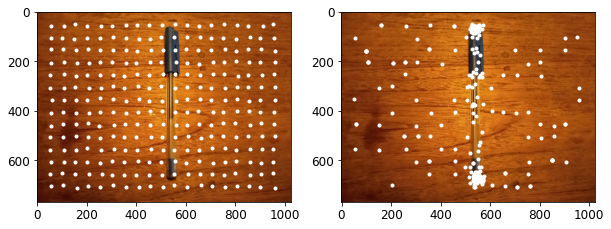

In [214]:
points1 = sample_points_grid(I) # sampling strategy 1
points2 = sample_points_around_pen(I, p1, p2) # sampling strategy 2

# plot both sampling strategies in a single figure using subplots
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(I)
plt.plot(points1[:,0], points1[:,1], 'w.')

plt.subplot(1,2,2)
plt.imshow(I)
plt.plot(points2[:,0], points2[:,1], 'w.')

To determine the labels of a patch,
we'll consider the distance of the patch's center to the tip of the pen (class 1),
to the end of the pen (class 2), or to the middle of the pen (class 3).
We will assign the class label based on which distance is the shortest,
but only if this shortest distance is under a certain threshold since the pen should still be visible within the patch.
If the patch is too far away from the pen, we will mark it as background (class 0).

In [215]:
CLASS_NAMES = [
    'background', # class 0
    'tip',        # class 1
    'end',        # class 2
    'middle'      # class 3
]

def make_labels_for_points(I, p1, p2, points):
    """ Determine the class label (as an integer) on point distance to different parts of the pen """
    num_points = points.shape[0]
    
    # for all points ....
    
    # ... determine their distance to tip of the pen
    dist1 = points - p1
    dist1 = np.sqrt(np.sum(dist1 * dist1, axis=1))
    
    # ... determine their distance to end of the pen
    dist2 = points - p2
    dist2 = np.sqrt(np.sum(dist2 * dist2, axis=1))

    # ... determine distance to pen middle
    alpha = np.linspace(0.2, 0.8, 100)
    midpoints = p1[None,:] * alpha[:,None] + p2[None,:] * (1. - alpha[:,None]) 
    dist3 = scipy.spatial.distance_matrix(midpoints, points)
    dist3 = np.min(dist3, axis=0)
    
    # the class label of a point will be determined by which distance is smallest
    #    and if that distance is at least below `dist_thresh`, otherwise it is background
    dist_thresh = WIN_SIZE[0] * 2./3.

    # store distance to closest point in each class in columns
    class_dist = np.zeros((num_points, 4))
    # this is a matrix. each row corresponds to a point. you have four columns for each rows since you have the duistance
    # of each point from the given reference (tip,body,bottom...)
    class_dist[:,0] = dist_thresh
    class_dist[:,1] = dist1
    class_dist[:,2] = dist2
    class_dist[:,3] = dist3
    
    # the class label is now the column with the lowest number
    labels = np.argmin(class_dist, axis=1)
    
    return labels


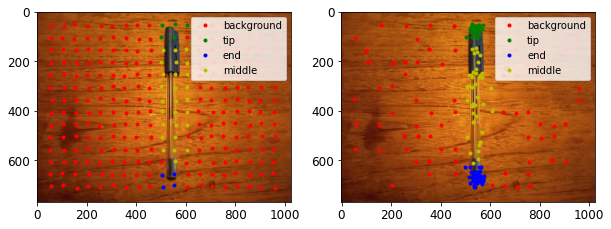

In [216]:
def plot_labeled_points(points, labels):
    plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'r.', label=CLASS_NAMES[0])
    plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g.', label=CLASS_NAMES[1])
    plt.plot(points[labels == 2, 0], points[labels == 2, 1], 'b.', label=CLASS_NAMES[2])
    plt.plot(points[labels == 3, 0], points[labels == 3, 1], 'y.', label=CLASS_NAMES[3])

labels1 = make_labels_for_points(I, p1, p2, points1)
labels2 = make_labels_for_points(I, p1, p2, points2)

plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(I)
plot_labeled_points(points1, labels1)
plt.legend()

plt.subplot(1,2,2)
plt.imshow(I)
plot_labeled_points(points2, labels2)
plt.legend()

As can be seen in the images, the sampling strategies result in different amount of patches being extracted. In the first strategy, for instance, there are many more "background" patches than in the second one.

To make this more conrete, determine the number of samples of each class in `labels1` and `labels2`,
complete the function `count_classes(labels)` below, which for a given array of `labels` creates a 4-dimensional numpy vector, where the i-th element contains the number of times that class occurs in `labels`.

In [217]:
def count_classes(labels):
    counts = np.array([ np.sum(np.array(labels)==x) for x in [0 ,1 ,2 ,3]])
    #raise NotImplementedError()
    return counts

class_counts1 = count_classes(labels1)
class_counts2 = count_classes(labels2)
print('class occurrences with strategy 1:', class_counts1)
print('class occurrences with strategy 2:', class_counts2)

class occurrences with strategy 1: [230   5   4  27]
class occurrences with strategy 2: [92 43 57 40]


In [218]:
assert(np.all(count_classes([3,0,2,3,1,0]) == [2,1,1,2])) # 2 zeros, 1 one, 1 two, 2 threes
assert(np.all(count_classes([3,2,1,2]) == [0,1,2,1])) # 0 zeros, 1 one, 2 twos, 1 three

# dtype of resulting array should be integer
cnt = count_classes([3,2,1,2])
assert(np.issubdtype(cnt.dtype, np.integer))


It is clear from these numbers that in strategy 1 one classes is very frequent, and the others much less so. With strategy 2, the classes are more uniformly distributed.

As an exercise, we can try to express the amount of 'uniformity' in a distribution using a key concept from information theory: *entropy*. This concept is also related to the concept of *cross-entropy* which you will learn about more later in the course. On YouTube you can find [a good video introduction on entropy and cross-entropy](https://www.youtube.com/watch?v=ErfnhcEV1O8).
For now, it suffices to state that entropy measures the amount of 'surprise' or 'uncertainty' we would have about the outcome if we would sample from a given distribution. For instance, if the distribution over the four classes would be so skewed that all samples belong to one class, the entropy would be 0 as there would be no surprise what class label we would see if we take a random sample.
On the other hand, the maximum entropy is achieved when all classes are completely equally likely to occur, i.e. the class labels would be uniformly distributed.

So, to compute the entropy of the class label counts of the two sampling strategies, first implement the following two functions:
1. a function `class_probs(counts)` which takes the class occurence `counts`, and return a distribution vector $\boldsymbol{p} = [p_1, p_2, p_3, p_4]$ , i.e. a vector of the same length (number of classes), with elements $p_c \in [0,1]$ which sum up to 1, $\sum_c p_c = 1$. Each element $p_c$ represent the class probability $P(c)$ that a sample in the distribution has class label $c$.
2. an `entropy(p)` function which takes a class distribution vector `p`, and computes the entropy for that distribution. The formula will be given below.

Afterwards, you can compute the entropy of each strategy,
and compared to the theoretic maximum entropy for a perfectly uniform distribution over the four classes.

In [219]:
def class_probs(counts):
    p = counts/np.sum(counts)
    #raise NotImplementedError()
    return p

In [220]:
# check uniform class distribution
test_dist_1 = np.array([0.25, 0.25, 0.25, 0.25])
assert(np.all(class_probs(np.array([1,1,1,1])) == test_dist_1))
assert(np.all(class_probs(np.array([100,100,100,100])) == test_dist_1))

# check non-uniform distributions
test_dist_2 = np.array([0., 1., 0., 0.])
assert(np.all(class_probs(np.array([0,42,0,0])) == test_dist_2))

test_dist_3 = np.array([0., 0.5, 0., 0.5])
assert(np.all(class_probs(np.array([0,1,0,1])) == test_dist_3))

# should sum up to one for any given of class counts
assert(np.sum(class_probs(np.array([36,20,9,412]))) == 1)
assert(np.all(class_probs(np.array([36,20,9,412]))) > 0.)

Now implement the [*entropy*](https://en.wikipedia.org/wiki/Entropy_(information_theory)) function.

The formula for entropy that this function should implement is:
$H = - \sum_c P(c) log(P(c)) $.

Note that this formula assumes that all classes have at least a non-zero chance of occurring, and you might run into numeric issues if $P(c) = 0$ for one or more classes $c$. The best thing to do is to remove any zero-probability classes if they occur.

For this exercise, you must implement this function yourself. You can numpy functions, but not any other statistical python packages.

In [221]:
def entropy(p):
    if any(p ==0.) :
        p =np.delete(p,p == 0.)
        
    H = - np.sum(p*np.log(p))
    #raise NotImplementedError()
    return H



In [222]:
# 1-class test case
#  (only one class distribution possible)
assert(entropy(np.array([1.0])) == 0)

# 2-class cases
# entropy of [0.5, 0.5] is approx 0.6931
assert(entropy(np.array([0.5, 0.5])) == -np.log(0.5))
assert(entropy(np.array([1.0, 0.0])) == 0)
# NOTE: if this test above doesn't work,
# you may still need to remove the elements with probability 0 from the input vector p

# 3-class test cases
# entropy of [0.1, 0.6, 0.3] is approx 0.89794572
assert(np.abs(entropy(np.array([0.1, 0.6, 0.3])) - 0.897945)<1e-4) 

In [223]:
ANSWER_STRATEGY1_ENTROPY = None
ANSWER_STRATEGY2_ENTROPY = None
ANSWER_MAX_FOUR_CLASS_ENTROPY = None

ANSWER_STRATEGY1_ENTROPY = entropy(class_probs(labels1))
ANSWER_STRATEGY2_ENTROPY = entropy(class_probs(labels2))
ANSWER_MAX_FOUR_CLASS_ENTROPY = max(ANSWER_STRATEGY2_ENTROPY,ANSWER_STRATEGY1_ENTROPY)
#raise NotImplementedError()

In [224]:
print('Your computed results:')
print('          Entropy for labels in strategy 1:', ANSWER_STRATEGY1_ENTROPY)
print('          Entropy for labels in strategy 2:', ANSWER_STRATEGY2_ENTROPY)
print('max. Entropy for four classes distribution:', ANSWER_MAX_FOUR_CLASS_ENTROPY)


Your computed results:
          Entropy for labels in strategy 1: 3.5376269862423815
          Entropy for labels in strategy 2: 4.86281803606457
max. Entropy for four classes distribution: 4.86281803606457


If everything is correct, the results you computed should confirm that the labels obtained with strategy 2 has an entropy close to the theoretic maximum, and thus is in an objective sense more uniformly distribution than the class labels obtained with strategy 1.

We will revisit entropy in future lectures and (Book) exercises.

### 1.7 Let's put it all together

Finally, we put all the preceding steps together to construct our a set of feature vectors from a given raw dataset of images. The following code performs the following steps:

* For each image in our dataset, do the following
    1. select patch locations, using one of the two strategies
    2. determine the class label for each location, considering the image annotations
    3. extract the image patches at the selected locations
    4. convert each image patches to a feature vector
* Concatenate all features and labels from the images together in one data matrix X, and one large label vector
* Also, for each feature vector we keep track in `imgids` from which image it was extracted, and in `points` at which pixel coordinate the patch was located. This will help us later to visualize the results.

In [225]:
def extract_patches(I, p1, p2, strategy=None):
    
    # by default, if no strategy is explicitly defined, use strategy 2
    if strategy == 1:
        points = sample_points_grid(I)
    if strategy == 2 or strategy is None:
        points = sample_points_around_pen(I, p1, p2)
    
    # determine the labels of the points
    labels = make_labels_for_points(I, p1, p2, points)
    
    xs = []
    for p in points:
        P = get_patch_at_point(I, p)
        x = patch_to_vec(P)
        xs.append(x)
    X = np.array(xs)

    return X, labels, points

def extract_multiple_images(idxs, Is, strategy=None):
    """
    idxs: index
    Is: the list contains all images
    """
    Xs = []
    ys = []
    points = []
    imgids = []

    for step, idx in enumerate(idxs):
        I = Is[idx]
        I_X, I_y, I_points = extract_patches(I, annots[idx,:2], annots[idx,2:], strategy=strategy)

        classcounts = count_classes(I_y)
        print(f'image {idx}, class count = {classcounts}')

        Xs.append(I_X)
        ys.append(I_y)
        points.append(I_points)
        imgids.append(np.ones(len(I_y),dtype=int)*idx)

    Xs = np.vstack(Xs)
    ys = np.hstack(ys)
    points = np.vstack(points)
    imgids = np.hstack(imgids)
    
    return Xs, ys, points, imgids

We can now construct the actual training and test data from the images:
- training data will consist of the first 26 images
- test data consists of the remaining 11 images

In [226]:
train_imgs = list(range(0,26))
test_imgs = list(range(26,len(Is)))

In [227]:

X_train, y_train, points_train, imgids_train = extract_multiple_images(train_imgs, Is)

image 0, class count = [90 36 52 51]
image 1, class count = [88 58 59 45]
image 2, class count = [91 54 54 51]
image 3, class count = [88 60 56 46]
image 4, class count = [82 54 58 56]
image 5, class count = [87 58 59 46]
image 6, class count = [89 57 58 46]
image 7, class count = [85 59 54 52]
image 8, class count = [85 63 60 41]
image 9, class count = [87 57 54 52]
image 10, class count = [75 57 58 60]
image 11, class count = [90 52 56 52]
image 12, class count = [88 59 59 44]
image 13, class count = [82  9 56 57]
image 14, class count = [84 56 61 49]
image 15, class count = [85 59 58 48]
image 16, class count = [85 57 55 53]
image 17, class count = [94 61 54 41]
image 18, class count = [83 58 28 54]
image 19, class count = [93 55 59 43]
image 20, class count = [89 56 53 52]
image 21, class count = [92 55 58 45]
image 22, class count = [91 56 56 47]
image 23, class count = [90 62 53 45]
image 24, class count = [89 58 62 41]
image 25, class count = [82 55 55 58]


In [228]:
X_test, y_test, points_test, imgids_test = extract_multiple_images(test_imgs, Is)

image 26, class count = [88 55 60 47]
image 27, class count = [84 59 55 52]
image 28, class count = [91 54 56 49]
image 29, class count = [88 59 59 44]
image 30, class count = [83 59 56 52]
image 31, class count = [88 55 59 48]
image 32, class count = [87 54 53 56]
image 33, class count = [87 54 55 54]
image 34, class count = [93 57 57 43]
image 35, class count = [93 60 52 45]
image 36, class count = [86 60 55 49]


Finally, let's add a simple interactive ipython widget to quickly inspect the images, and the sampled locations.

In [229]:
def show_gt_labels(idx):
    I = Is[idx]
    
    I_points = points_train[imgids_train == idx,:]
    I_ys = y_train[imgids_train == idx]

    plt.figure()
    plt.imshow(I)
    plot_labeled_points(I_points, I_ys)
    plt.legend()
    plt.show()

ipywidgets.interact(show_gt_labels, idx=(0,len(train_imgs)-1))

interactive(children=(IntSlider(value=12, description='idx', max=25), Output()), _dom_classes=('widget-interac…

<function __main__.show_gt_labels(idx)>

We can also visualize the samples from each class

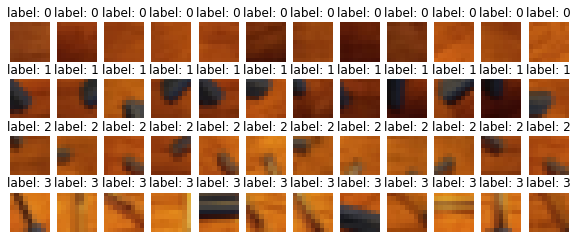

In [230]:
def plot_samples(Ps, labels):
    uls = np.unique(labels)
    nclasses = len(uls)
    nsamples = 12
    
    plt.figure(figsize=(10,4))
    
    for lidx, label in enumerate(uls):
        idxs = np.where(labels == label)[0]
        idxs = np.random.choice(idxs, nsamples, replace=False)
        
        for j, idx in enumerate(idxs):
            P = Ps[idx,:]
            P = P.reshape(FEAT_SIZE)
            
            plt.subplot(nclasses, nsamples, lidx*nsamples+j+1)
            plt.imshow(P, clim=(0,1))
            plt.axis('off')
            plt.title('label: %d' % label)
        
    plt.show()

plot_samples(X_train, y_train)

## 2. Shortlist promising models

Let's train some classifiers.

* a *Logistic Regression classsifier* using the `SGDClassifier` class in the `linear_model` package of sklearn. See also Chapter 3 of the book. Call the classifier object `sgd_clf`. Look into the documentation of `SGDClassifier` to see how to set the loss to the logistic regression loss.
* a *Decision Tree* using `DecisionTreeClassifier`. Note that Chapter 2 used the related `DecisionTreeRegressor`, which uses a similar approach, but then for regression
* a *Random Forest* using `RandomForestClassifier`. See also Chapter 2.

You may need to import the relevant modules from `sklearn`.

PS.: Do NOT train the classifiers yet, we'll do that in a cell block below.

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

sgd_clf = None # this should be the Logistic Regression Classifier
dt_clf = None # this should be the Decision Tree classifer
rf_clf = None # this should be the Random Forest classifier

sgd_clf= SGDClassifier(loss='log')
dt_clf = DecisionTreeClassifier(max_depth = 9)
rf_clf = RandomForestClassifier()


#raise NotImplementedError()


In [232]:

assert(isinstance(sgd_clf, sklearn.linear_model.SGDClassifier))
assert(isinstance(dt_clf, sklearn.tree.DecisionTreeClassifier))
assert(isinstance(rf_clf, sklearn.ensemble.RandomForestClassifier))


In [233]:
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)
# I eliminate the useless dimesion that comes out of the previous pipeline
print(np.shape(X_train))

(6405, 243)


Train each classifier on the training data `X_train` and `y_train`.

In [150]:
# Train the classifiers here
sgd_clf.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)

#raise NotImplementedError()

RandomForestClassifier()

In [151]:
assert(sgd_clf.n_iter_ > 0) # NOTE: n_iter_ will not exist untill training
assert(dt_clf.n_features_ > 0) # NOTE: n_features_ will not exist untill training
assert(rf_clf.n_features_ > 0) # NOTE: n_features_ will not exist untill training

### 2.1 Evaluation

We start evaluation by just focusing on the Logistic Regression, and see what the accuracy is on the **training data** on which it was optimized on.

In [152]:
# predict the class labels of the linear classifier on the training data
y_train_pred = None
y_train_pred = sgd_clf.predict(X_train)
# YOUR CODE HERE
#raise NotImplementedError()

In [153]:
assert(np.all(y_train_pred == y_train_pred))

To compute the accuracy of the prediction, we can use `accuracy_score` from sklearn. However, you should first show that you know how to implement the accuracy yourself. Therefore implement a function `my_accuracy_score` which behaves like sklearn's `accuracy_score`, but do so without using any functions from sklearn modules. You may use numpy if you want to in this function.

In [154]:

def my_accuracy_score(y, y_pred):
    # the accuracy says how many true positives I have in comparison to the positives I have identified
    x = np.sum(np.array(y) == np.array(y_pred))/len(y)
    return x
    
    #raise NotImplementedError()

print('Sklearns accuracy:', sklearn.metrics.accuracy_score(y_train, y_train_pred))
print('    Your accuracy:', my_accuracy_score(y_train, y_train_pred))

Sklearns accuracy: 0.6540202966432475
    Your accuracy: 0.6540202966432475


In [155]:
from sklearn.metrics import accuracy_score
assert(my_accuracy_score(y_train, y_train_pred) == accuracy_score(y_train, y_train_pred))

# let's also try some dummy values
assert(my_accuracy_score([1,2,4,2,3,2,2], [4,2,4,4,3,2,1]) == 4./7.)
# this should also work with numpy arrays
assert(my_accuracy_score(np.array([1,2,4,2,3,2,2]), np.array([4,2,4,4,3,2,1])) == 4./7.)

Ok, let's create a function to put these steps together, so we can easily evaluate any classifier on a given labeled dataset (X,y).
As part of the performance statistics, let's report the accuracy and the confusion matrix.
You do not need to compute the confusion matrix manually, you can use the builtin function from sklearn for this. You are also free to use sklearn's `accuracy_score()`.

In [156]:
from sklearn.metrics import confusion_matrix,accuracy_score
#raise NotImplementedError()

def eval_classifier(clf, X, y):
    accuracy = None # compute this (you can use sklearn)
    confmat = None # compute this (you can use sklearn)
    
    y_pred   = clf.predict(X)
    accuracy = accuracy_score(y,y_pred)
    confmat  = confusion_matrix(y,y_pred)
    #raise NotImplementedError()
    
    return accuracy, confmat

We can now easily check how all classifiers perform on **the training data**.

In [157]:
def report_eval(name, accuracy, confmat):
    print(f'*** {name} ***')
    print(f' confusion matrix:')
    print(confmat)
    print(f' accuracy: {accuracy:.3f}')
    print()

print('-- TRAINING data evaluation --')
print()

# logistic regression
sgd_train_accuracy, sgd_train_confmat = eval_classifier(sgd_clf, X_train, y_train)
report_eval('Logistic Regression', sgd_train_accuracy, sgd_train_confmat)

# decision tree
dt_train_accuracy, dt_train_confmat = eval_classifier(dt_clf, X_train, y_train)
report_eval('Decision Tree', dt_train_accuracy, dt_train_confmat)

# random forest
rf_train_accuracy, rf_train_confmat = eval_classifier(rf_clf, X_train, y_train)
report_eval('Random Forest', rf_train_accuracy, rf_train_confmat)


-- TRAINING data evaluation --

*** Logistic Regression ***
 confusion matrix:
[[1801  110   37  316]
 [ 172  800   50  399]
 [ 380   72  576  417]
 [  99   96   68 1012]]
 accuracy: 0.654

*** Decision Tree ***
 confusion matrix:
[[2212    6   16   30]
 [  64 1270   48   39]
 [ 211   20 1184   30]
 [ 155   28   30 1062]]
 accuracy: 0.894

*** Random Forest ***
 confusion matrix:
[[2264    0    0    0]
 [   0 1421    0    0]
 [   0    0 1445    0]
 [   0    0    0 1275]]
 accuracy: 1.000



Use the same function to evaluate how each of the three classifiers perform on **the TEST data**

In [158]:
print('-- TEST data evaluation --')
print()

# logistic regression
sgd_test_accuracy, sgd_test_confmat = eval_classifier(sgd_clf, X_test, y_test)
report_eval('Logistic Regression', sgd_test_accuracy, sgd_test_confmat)

# decision tree
dt_test_accuracy, dt_test_confmat = eval_classifier(dt_clf, X_test, y_test)
report_eval('Decision Tree', dt_test_accuracy, dt_test_confmat)

# random forest
rf_test_accuracy, rf_test_confmat = eval_classifier(rf_clf, X_test, y_test)
report_eval('Random Forest', rf_test_accuracy, rf_test_confmat)


-- TEST data evaluation --

*** Logistic Regression ***
 confusion matrix:
[[675  68  15 210]
 [ 45 258 100 223]
 [103  15 170 329]
 [ 35  46  44 414]]
 accuracy: 0.552

*** Decision Tree ***
 confusion matrix:
[[892   1  21  54]
 [ 81 357  70 118]
 [ 85  50 376 106]
 [ 81  66  59 333]]
 accuracy: 0.712

*** Random Forest ***
 confusion matrix:
[[923   2   9  34]
 [ 79 452  22  73]
 [ 17   4 491 105]
 [ 26  20  39 454]]
 accuracy: 0.844



In [159]:
# expect values to be in this range ...
assert(np.abs(sgd_test_accuracy - 0.59) < 0.05)
assert(np.abs(dt_test_accuracy - 0.69) < 0.05)
assert(np.abs(rf_test_accuracy - 0.84) < 0.05)

**Q**: Based on these results, which of these classifiers is overfitting most?

Answer by only uncommenting the correct answer in the code block below.

In [160]:
# answer by uncommenting only the correct option from this block below
#ANSWER_OVERFITTING_MOST = 'no answer given yet ...'
#ANSWER_OVERFITTING_MOST = 'Logistic Regression'
#ANSWER_OVERFITTING_MOST = 'Decision Tree'
ANSWER_OVERFITTING_MOST = 'Random Forest'

# YOUR CODE HERE
#aise NotImplementedError()

In [161]:
print('Your answer: ', ANSWER_OVERFITTING_MOST)

# to answer, you should have selected one of the three options ...
assert(ANSWER_OVERFITTING_MOST in ('Logistic Regression', 'Decision Tree', 'Random Forest'))


Your answer:  Random Forest


Evaluating on the training data is not giving us a realistic view of the performance of the classifier on the new (test) data. However, we should avoid to rely on our test data to perform model selection or hyperparameter optimization. You have learned of a better approach to estimate the test performance without using the test data, but by using the training data only (!). Use this strategy to get an expected value and standard deviation for the test accuracy.

Note: you can use the default settings that sklearn provides for its implementation of this strategy, only make sure you estimate the `accuracy` and not some other metric.

In [162]:
from sklearn.model_selection import cross_val_score
# YOUR CODE HERE
#raise NotImplementedError()

def predict_classifier_test_accuracy(clf, X_train, y_train):
    scores = cross_val_score(clf,X_train, y_train,scoring="accuracy", cv=8)
    
    # cv = number of stratificartions 
    # scoring = accuracy
    mean_accuracy = None # determine this
    stddev_accuracy = None # determine this
    mean_accuracy = np.mean(scores)
    stddev_accuracy = np.std(scores)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return mean_accuracy, stddev_accuracy

In [163]:
# Let's see if it works. NOTE: this may take a while ...

sgd_mean_accuracy, sgd_stddev_accuracy = predict_classifier_test_accuracy(sgd_clf, X_train, y_train)
print('*** Logistic Regression ***')
print('    Mean:', sgd_mean_accuracy)
print('Std.dev.:', sgd_stddev_accuracy)
print()

dt_mean_accuracy, dt_stddev_accuracy = predict_classifier_test_accuracy(dt_clf, X_train, y_train)
print('*** DT Classifier ***')
print('    Mean:', dt_mean_accuracy)
print('Std.dev.:', dt_stddev_accuracy)
print()


rf_mean_accuracy, rf_stddev_accuracy = predict_classifier_test_accuracy(rf_clf, X_train, y_train)
print('*** RF Classifier ***')
print('    Mean:', rf_mean_accuracy)
print('Std.dev.:', rf_stddev_accuracy)
print()

# Compare expected accuracy to true test accuracy. Difference should be small!
print('Comparing to test accuracy ...')
assert(np.abs(sgd_mean_accuracy - sgd_test_accuracy) < 0.1)
assert(np.abs(dt_mean_accuracy - dt_test_accuracy) < 0.1)
assert(np.abs(rf_mean_accuracy - rf_test_accuracy) < 0.1)
print('OK!')

*** Logistic Regression ***
    Mean: 0.5901429853308364
Std.dev.: 0.07285753869548765

*** DT Classifier ***
    Mean: 0.7095778714107366
Std.dev.: 0.055303818999190194

*** RF Classifier ***
    Mean: 0.8614991026841448
Std.dev.: 0.06988637354981725

Comparing to test accuracy ...
OK!


## 2.2 Visualize the results

It is important to not only look at statistics, but also to confirm yourself that the statistics make sense.
Let's visualize the classification results by drawing the predicted labels back on the respective images.

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [165]:
def plot_image_classification_results(clf, img_idx, Ps_test, labels_test, points_test, imgids_test):
    mask = imgids_test == img_idx

    y_test_pred = clf.predict(Ps_test[mask])
    y_test_pred_prob = clf.predict_proba(Ps_test[mask])
    points = points_test[mask,:]

    confmat = confusion_matrix(labels_test[mask], y_test_pred)
    accuracy = accuracy_score(labels_test[mask], y_test_pred)
    #jaccard = sklearn.metrics.jaccard_score(labels_test[mask], y_test_pred, average='macro')

    print(f' confusion matrix:')
    print(confmat)
    print(f' accuracy: {accuracy:.3f}')
    #print(f'  jaccard: {jaccard:.3f}')

    best_idx1 = y_test_pred_prob[:,1].argmax()
    best_idx2 = y_test_pred_prob[:,2].argmax()
    
    # load image
    I = Is[img_idx]

    plt.figure()
    plt.imshow(I)
    plt.plot(points[y_test_pred==0, 0], points[y_test_pred==0, 1], '.r')
    plt.plot(points[y_test_pred==3, 0], points[y_test_pred==3, 1], '.y')
    plt.plot(points[y_test_pred==1, 0], points[y_test_pred==1, 1], '.g')
    plt.plot(points[y_test_pred==2, 0], points[y_test_pred==2, 1], '.b')
    plt.plot(points[(best_idx1, best_idx2), 0], points[(best_idx1, best_idx2), 1], 'c-', linewidth=2)
    plt.plot(points[best_idx1, 0], points[best_idx1, 1], 'co')
    plt.show()

In [166]:
# On TRAIN data
train_img_idxs = np.unique(imgids_train)
classifiers = {'Logistic Regression': sgd_clf, 'Random Forest': rf_clf, 'Decision-Tree': dt_clf}

def plot_nth_train_result(clf, n):
    plot_image_classification_results(clf, train_img_idxs[n], X_train, y_train, points_train, imgids_train)

ipywidgets.interact(plot_nth_train_result, clf=classifiers, n=(0,len(train_img_idxs)-1))

interactive(children=(Dropdown(description='clf', options={'Logistic Regression': SGDClassifier(loss='log'), '…

<function __main__.plot_nth_train_result(clf, n)>

In [167]:
# On TEST data
test_img_idxs = np.unique(imgids_test)
classifiers = {'Logistic Regression': sgd_clf, 'Random Forest': rf_clf, 'Decision-Tree': dt_clf}

def plot_nth_test_result(clf, n):
    plot_image_classification_results(clf, test_img_idxs[n], X_test, y_test, points_test, imgids_test)

ipywidgets.interact(plot_nth_test_result, clf=classifiers, n=(0,len(test_img_idxs)-1))

interactive(children=(Dropdown(description='clf', options={'Logistic Regression': SGDClassifier(loss='log'), '…

<function __main__.plot_nth_test_result(clf, n)>

Confirm with visual inspection if the evaluation statistics make sense.
For instance, try to see if you find any patterns in the errors that the classifiers make,
and under what conditions most errors occur.

# 3. Test on uniformly sampled grid (strategy 1)

It may look like the classification task has been solved, however our procedure to extract the patches from the training and testing images oversamples non-background locations. While this results in more balanced classes, this is not realistic for how the detector could be used in practice. In a true test case, we don't already know where the pen is located. We should therefore re-investigate our test images, and check what the test performance is on uniformly distributed patches.

Let's use the classifiers that were already trained on strategy 1, and see what their test performance is on strategy 2.

In [168]:
X_test2, y_test2, points_test2, imgids_test2 = extract_multiple_images(test_imgs, Is, strategy=1)
X_test2 = np.squeeze(X_test2)
print('Overal class count:')
print(count_classes(y_test2))

image 26, class count = [230   7   6  23]
image 27, class count = [232   5   5  24]
image 28, class count = [231   6   6  23]
image 29, class count = [234   6   5  21]
image 30, class count = [232   7   4  23]
image 31, class count = [235   5   5  21]
image 32, class count = [233   6   6  21]
image 33, class count = [236   4   4  22]
image 34, class count = [231   5   6  24]
image 35, class count = [232   6   5  23]
image 36, class count = [230   6   6  24]
Overal class count:
[2556   63   58  249]


In [169]:
# On TEST data
test_img_idxs2 = np.unique(imgids_test2)
classifiers = {'Logistic Regression': sgd_clf, 'Random Forest': rf_clf, 'Decision-Tree': dt_clf}

def plot_nth_test_result2(clf, n):
    plot_image_classification_results(clf, test_img_idxs2[n], X_test2, y_test2, points_test2, imgids_test2)

ipywidgets.interact(plot_nth_test_result2, clf=classifiers, n=(0,len(test_img_idxs2)-1))

interactive(children=(Dropdown(description='clf', options={'Logistic Regression': SGDClassifier(loss='log'), '…

<function __main__.plot_nth_test_result2(clf, n)>

Interestingly, if you compare the accuracy between the sampling strategies for the same test image and same classifier, you may notice that often the accuracy on the uniform grid (strategy 1) is higher. The test classes are so unbalanced, and as long as a classifier can get most of the "easy" background patches correct, it will obtain a high accuracy.

On the other hand, visually the classifiers seem to make many more mistakes, and we see that the classifiers often misclassify large regions in the image. Maybe the classifiers are too 'eager' to classify patches as pen-parts as in the training data these classes were more likely to occur.

## 3.1 Timing evaluation

Let's also try to see how we can use the jupyter notebook to get some quick and dirty timing results for when you are running some experiments. Keeping an eye on how long a particular computation steps takes can be important when planning your experiments, and to figure out how your problems scale with larger and more complex datasets.

We'll focus on timing the training and testing phases of the classifiers. Note that a proper timing evaluation requires running each procedure multiple times, but here we will skip this step and only fit each model once.

*Hint*: you can use the special command `%%time` at the start of a notebook cell to report the amount of time in seconds in took to execute a cell.
To illustrate this, we have some simple examples below.

In [170]:
def slow_function():
    # this is a dummy function which does nothing, but just waits for 0.5 seconds to illustrate time profiling
    import time
    time.sleep(0.2)

In [171]:
# Example of using %time
#   Note that %time is a "magic" jupyter notebook command, and not actual python code
#   the %time command automatically times the execution spped of the command following it

%time slow_function() # timed
slow_function() # not timed

CPU times: user 685 µs, sys: 1.12 ms, total: 1.8 ms
Wall time: 204 ms


In [172]:
%%time
# Example of using %%time
#   Note that %%time is a "magic" cell command, which applies to the whole cell rather than a single line.
#   Note how the cell STARTS with the %%time command

# whole cell is timed
slow_function()
slow_function()

CPU times: user 866 µs, sys: 1.12 ms, total: 1.99 ms
Wall time: 410 ms


How long does it take to train each classifier on your computer?
Report your results here (it is sufficient to print the timing results in the output, you don't need to store these numbers in variables)

In [173]:

%time sgd_clf.fit(X_train,y_train)
%time dt_clf.fit(X_train,y_train)
%time rf_clf.fit(X_train,y_train)
#raise NotImplementedError()

CPU times: user 1.17 s, sys: 8.3 ms, total: 1.18 s
Wall time: 1.25 s
CPU times: user 897 ms, sys: 4.66 ms, total: 902 ms
Wall time: 905 ms
CPU times: user 6.82 s, sys: 21.7 ms, total: 6.84 s
Wall time: 6.87 s


RandomForestClassifier()

Now test the how long it takes each classifier to make a prediction on all training data

In [174]:
%time sgd_clf.predict(X_train)
%time dt_clf.predict(X_train)
%time rf_clf.predict(X_train)
#raise NotImplementedError()

CPU times: user 7.09 ms, sys: 1.69 ms, total: 8.78 ms
Wall time: 7.07 ms
CPU times: user 11.1 ms, sys: 2.44 ms, total: 13.6 ms
Wall time: 11.7 ms
CPU times: user 419 ms, sys: 17.3 ms, total: 436 ms
Wall time: 176 ms


array([0, 3, 0, ..., 3, 3, 3])

**Q**: Based on these time results, which method will have the least latency when processing images sequentially on a live video stream from the robot?

Answer by uncommenting only the correct option from the code block below.

In [175]:
# answer by uncommenting only the correct option from this block below
#ANSWER_LOWEST_LATENCY = 'no answer given yet ...'
ANSWER_LOWEST_LATENCY = 'Logistic Regression'
#ANSWER_LOWEST_LATENCY = 'Decision Tree'
#ANSWER_LOWEST_LATENCY = 'Random Forest'

# NOTE : on my computre the logistic regression and the decision tree seems to have almost the same
# result. When I rerun the trainig and prediction phase I often get different result from the previous run.
# the random tree is by far the slowest one.


#raise NotImplementedError()

In [176]:
print('Your answer: ', ANSWER_LOWEST_LATENCY)

# to answer, you should have selected one of the three options ...
assert(ANSWER_LOWEST_LATENCY in ('Logistic Regression', 'Decision Tree', 'Random Forest'))


Your answer:  Logistic Regression


## 3.2 Train and test models with your own data

The final task of this practicum is that you and your lab partner do your *own* data collection and annotation,

The following instructions should be done *indepdently* by both lab partners:
* Collect several images of your pen with your phone, the resoution should be at least 1024 pixels in width and height.
* Take the pictures from above your desk from a more or less fixed distance to the pen, similar to the images used in the previous experiments.
* Make sure you rotate the pen everytime such that it always appears at slightly different angles and locations in the images.
* Copy the images from your phone to a new subfolder in the `images/` directory. This could be done via a usb cable, wireless transfer, or some cloud service that you can access or your phone or computer. I'm sure you'll be able to figure something out ;) More specifically:
    * place the images from the first lab partner in to the `images/lab_partner1/` directory
    * place the images from the second lab partner in to the `images/lab_partner2/` directory
    * (see how is lab partner 1 and how is lab partner 2 in the first code cell at the top of this notebook)
* Annotate the start and end points of the pen in all iamges using the provided `Data annotator.ipynb`, which will also resize the images such that the max height or width of 1024 pixels. This way, all extract image $100 \times 100$ image patches should show more or less a similar size.
* Ensure you have at least about 20 images for training, and 10 images for testing.
* Exchange your annotated dataset with your lab partner, such that you both have the same filled image directories on your computers.

**NOTE:** We will ask you to upload your own annotated image directories to get with this worked out notebook. We may share your datasets with other students in this course for a follow-up experiment. Make sure you have **no sensitive or unappropriate content** in the images that you use, and that you are okay with others seeing them too.

### 3.3 Train a classifier on the images of lab partner 1

Using the data of the first lab partner,
* Prepare a training and testing dataset, similar to what we did before (using the 2nd patch sampling strategy). You can use all the functions that have been defined above, you don't need to redefine those.
* On this dataset select a classifier, and compute test performance.
* Report the accuracy and confusion matrix of the selected classifier on the test dataset.

You are free to add cells below to complete this task, we'll only add a check that the images are found in the correct directory.

In [177]:
partner1_filenames = list_images('images/lab_partner1')

# import annotations
Is = [plt.imread(I) for I in partner1_filenames]
annot_filename = os.path.join('images/lab_partner1', 'annots.npy')
with open(annot_filename,'rb') as ann :
     annots = pickle.load(ann)
print(annots.shape)

test_percentage = int(0.2*np.shape(annots)[0])
train_percentage = int(0.8*np.shape(annots)[0])

train_imgs = list(range(0,train_percentage))
test_imgs = list(range(train_percentage,len(Is)))
# extract datasets

myX_train, myy_train, mypoints_train, myimgids_train = extract_multiple_images(train_imgs, Is)
myX_test, myy_test, mypoints_test, myimgids_test = extract_multiple_images(test_imgs, Is)

myX_train = np.squeeze(myX_train)
myX_test = np.squeeze(myX_test)




Found 37 image files in the directory "images/lab_partner1"
(37, 4)
image 0, class count = [86 58 58 48]
image 1, class count = [100   0   0   0]
image 2, class count = [87 54 58 48]
image 3, class count = [87 60 57 46]
image 4, class count = [87 59 63 41]
image 5, class count = [91 54 58 47]
image 6, class count = [87 56 61 46]
image 7, class count = [90 54 60 46]
image 8, class count = [89 64 53 44]
image 9, class count = [89 55 62 44]
image 10, class count = [100   0   0   0]
image 11, class count = [91 56 59 44]
image 12, class count = [86 59 57 48]
image 13, class count = [83 56 60 51]
image 14, class count = [88 56 59 47]
image 15, class count = [93 58 55 44]
image 16, class count = [87 55 57 51]
image 17, class count = [87 59 57 47]
image 18, class count = [87 55 59 49]
image 19, class count = [92 57 60 41]
image 20, class count = [85 55 60 49]
image 21, class count = [89 59 56 46]
image 22, class count = [92 55 58 45]
image 23, class count = [90 56 54 50]
image 24, class count 

In [178]:
print(np.shape(myX_train))
print(np.shape(myy_train))

(6885, 243)
(6885,)


In [179]:
# useful visualization procedure
def show_gt_labels(idx):
    I = Is[idx]
    
    I_points = mypoints_train[myimgids_train == idx,:]
    I_ys = myy_train[myimgids_train == idx]

    plt.figure()
    plt.imshow(I)
    plot_labeled_points(I_points, I_ys)
    plt.legend()
    plt.show()

ipywidgets.interact(show_gt_labels, idx=(0,len(train_imgs)-1))

interactive(children=(IntSlider(value=14, description='idx', max=28), Output()), _dom_classes=('widget-interac…

<function __main__.show_gt_labels(idx)>

In [180]:
assert(len(partner1_filenames) >= 30) # we need at least 30 images

In [181]:
# I will go for a decison tree
my_decision_tree = DecisionTreeClassifier(random_state =42)
my_decision_tree.fit(myX_train,myy_train)

print('-- TRAIN data evaluation --')
print()
eval_classifier(my_decision_tree,myX_train,myy_train)





-- TRAIN data evaluation --



(1.0,
 array([[2587,    0,    0,    0],
        [   0, 1529,    0,    0],
        [   0,    0, 1512,    0],
        [   0,    0,    0, 1257]]))

In [182]:
print('-- TEST data evaluation --')
print()
rf_test_accuracy, rf_test_confmat = eval_classifier(my_decision_tree,myX_test,myy_test)
report_eval('MyClassifier', rf_test_accuracy, rf_test_confmat)


-- TEST data evaluation --

*** MyClassifier ***
 confusion matrix:
[[670   5   7  30]
 [ 18 249  95 101]
 [ 29  78 261  85]
 [ 18  66  80 208]]
 accuracy: 0.694



In [183]:
# On TRAIN data
train_img_idxs = np.unique(myimgids_train)
classifiers = {'Decision-Tree': my_decision_tree}

def plot_nth_train_result(clf, n):
    plot_image_classification_results(clf, train_img_idxs[n], myX_train, myy_train, mypoints_train, myimgids_train)

ipywidgets.interact(plot_nth_train_result, clf=classifiers, n=(0,len(train_img_idxs)-1))

interactive(children=(Dropdown(description='clf', options={'Decision-Tree': DecisionTreeClassifier(random_stat…

<function __main__.plot_nth_train_result(clf, n)>

In [184]:
# On test data
test_img_idxs = np.unique(myimgids_test)
classifiers = {'Decision-Tree': my_decision_tree}

def plot_nth_test_result(clf, n):
    plot_image_classification_results(clf, test_img_idxs[n], myX_test, myy_test, mypoints_test, myimgids_test)

ipywidgets.interact(plot_nth_test_result, clf=classifiers, n=(0,len(test_img_idxs)-1))

interactive(children=(Dropdown(description='clf', options={'Decision-Tree': DecisionTreeClassifier(random_stat…

<function __main__.plot_nth_test_result(clf, n)>

### 3.4 Train a classifier on the images of lab partner 2

Do the same for the images the second lab partner here below. Same rules apply.

In [185]:
partner2_filenames = list_images('images/lab_partner2')

Found 32 image files in the directory "images/lab_partner2"


In [186]:
assert(len(partner2_filenames) >= 30) # we need at least 30 images



In [187]:
partner2_filenames = list_images('images/lab_partner2')

# import annotations
Is2 = [plt.imread(I) for I in partner2_filenames]
annot_filename = os.path.join('images/lab_partner2', 'annots.npy')
with open(annot_filename,'rb') as ann :
     annots = pickle.load(ann)
print(annots.shape)

test_percentage = int(round(0.2*np.shape(annots)[0]))
train_percentage = int(round(0.8*np.shape(annots)[0]))

train_imgs2 = range(0,train_percentage)
test_imgs2  = range(train_percentage,len(Is2))
# extract datasets

myX_train2, myy_train2, mypoints_train2, myimgids_train2 = extract_multiple_images(train_imgs2, Is2)
myX_test2, myy_test2, mypoints_test2, myimgids_test2     = extract_multiple_images(test_imgs2, Is2)

myX_train2 = np.squeeze(myX_train2)
myX_test2  = np.squeeze(myX_test2)




Found 32 image files in the directory "images/lab_partner2"
(32, 4)
image 0, class count = [91 60 54 45]
image 1, class count = [90 52 55 53]
image 2, class count = [90 59 53 48]
image 3, class count = [93 53 52 52]
image 4, class count = [91 56 55 48]
image 5, class count = [89 53 61 47]
image 6, class count = [93 59 55 43]
image 7, class count = [91 57 55 47]
image 8, class count = [90 53 52 55]
image 9, class count = [90 58 56 46]
image 10, class count = [90 60 54 46]
image 11, class count = [87 60 54 49]
image 12, class count = [92 56 51 51]
image 13, class count = [96 55 55 44]
image 14, class count = [92 59 60 39]
image 15, class count = [91 62 57 40]
image 16, class count = [89 54 57 50]
image 17, class count = [91 57 61 41]
image 18, class count = [91 57 54 48]
image 19, class count = [95 55 53 47]
image 20, class count = [86 59 61 44]
image 21, class count = [92 55 57 46]
image 22, class count = [92 51 51 56]
image 23, class count = [90 57 52 51]
image 24, class count = [93 57

In [188]:
## TRAINING PART

y_decision_tree = DecisionTreeClassifier(random_state =42)
my_decision_tree.fit(myX_train2,myy_train2)
classifier = {'Decision Tree':my_decision_tree}

def plot_image_classification_results2(clf, img_idx, Ps_test, labels_test, points_test, imgids_test):
    mask = imgids_test == img_idx

    y_test_pred = clf.predict(Ps_test[mask])
    y_test_pred_prob = clf.predict_proba(Ps_test[mask])
    points = points_test[mask,:]

    confmat = confusion_matrix(labels_test[mask], y_test_pred)
    accuracy = accuracy_score(labels_test[mask], y_test_pred)
    #jaccard = sklearn.metrics.jaccard_score(labels_test[mask], y_test_pred, average='macro')

    print(f' confusion matrix:')
    print(confmat)
    print(f' accuracy: {accuracy:.3f}')
    #print(f'  jaccard: {jaccard:.3f}')

    best_idx1 = y_test_pred_prob[:,1].argmax()
    best_idx2 = y_test_pred_prob[:,2].argmax()
    
    # load image
    I = Is2[img_idx]

    plt.figure()
    plt.imshow(I)
    plt.plot(points[y_test_pred==0, 0], points[y_test_pred==0, 1], '.r')
    plt.plot(points[y_test_pred==3, 0], points[y_test_pred==3, 1], '.y')
    plt.plot(points[y_test_pred==1, 0], points[y_test_pred==1, 1], '.g')
    plt.plot(points[y_test_pred==2, 0], points[y_test_pred==2, 1], '.b')
    plt.plot(points[(best_idx1, best_idx2), 0], points[(best_idx1, best_idx2), 1], 'c-', linewidth=2)
    plt.plot(points[best_idx1, 0], points[best_idx1, 1], 'co')
    plt.show()


test_img_idxs = np.unique(myimgids_train2)
def plot_nth_train_result(clf, n):
    plot_image_classification_results2(clf, train_img_idxs[n], myX_train2, myy_train2, mypoints_train2, myimgids_train2)

ipywidgets.interact(plot_nth_train_result, clf=classifiers, n=(0,len(train_img_idxs)-1))



interactive(children=(Dropdown(description='clf', options={'Decision-Tree': DecisionTreeClassifier(random_stat…

<function __main__.plot_nth_train_result(clf, n)>

In [189]:
print('-- TEST data evaluation from partner 1 --')
print()
rf_test_accuracy, rf_test_confmat = eval_classifier(my_decision_tree,myX_train,myy_train)
report_eval('MyClassifier', rf_test_accuracy, rf_test_confmat)

test_img_idxs = np.unique(myimgids_train)
def plot_nth_test_result(clf, n):
    plot_image_classification_results(clf, test_img_idxs[n], myX_train, myy_train, mypoints_train, myimgids_train)

ipywidgets.interact(plot_nth_test_result, clf=classifiers, n=(0,len(test_img_idxs)-1))



-- TEST data evaluation from partner 1 --

*** MyClassifier ***
 confusion matrix:
[[2117   70  162  238]
 [1062   57  246  164]
 [1036   94  237  145]
 [ 624  112  285  236]]
 accuracy: 0.384



interactive(children=(Dropdown(description='clf', options={'Decision-Tree': DecisionTreeClassifier(random_stat…

<function __main__.plot_nth_test_result(clf, n)>

As the final step, let's see how well your classifier generalizes to new data that has been collected independently of the training data. This is what often happens we we use pre-trained classifiers from another lab, or when a robot is placed in a different environment than where it was developed.

Add code below to take the trained classifier on the **training data** of **lab partner 2**, and evaluate how well it performs on the **test data** of **lab partner 1**.
Apart from some statistics, also visually inspect the classification result.
Finish with a Markdown cell where you explain your observations: how well did the classifier perform on the other dataset? Is that better or worse than you both expected? Can you see what kind of patches it is misclassifying?

YOUR ANSWER HERE

This finishes this week's practicum! 
Please zip your saved notebook with your solutions, and don't forgot to include this zip also your and your labpartner's annotated datasets.
Each dataset directory should contain the annotations you created, and the images you collected (but only the ones resixed to max dimensions of 1024 pixels by the "Data annotator" tool, not your huge original high-resolution pictures!).
Hopefully if we collect a large and diverse dataset from all students, we can make our robot more robustly pickup pens or its collections :)